In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# read files from github

url1 = 'https://raw.githubusercontent.com/Baronontrees/team-flyingTigers-CANDEV-project/main/team-flyingTigers-CANDEV-project/Form1.csv'
url2 = 'https://raw.githubusercontent.com/Baronontrees/team-flyingTigers-CANDEV-project/main/team-flyingTigers-CANDEV-project/Form2.csv'
url3 = 'https://raw.githubusercontent.com/Baronontrees/team-flyingTigers-CANDEV-project/main/team-flyingTigers-CANDEV-project/Form3.csv'
url4 = 'https://raw.githubusercontent.com/Baronontrees/team-flyingTigers-CANDEV-project/main/team-flyingTigers-CANDEV-project/Form4.csv'
url5 = 'https://raw.githubusercontent.com/Baronontrees/team-flyingTigers-CANDEV-project/main/team-flyingTigers-CANDEV-project/Form5.csv'
url6 = 'https://raw.githubusercontent.com/Baronontrees/team-flyingTigers-CANDEV-project/main/team-flyingTigers-CANDEV-project/Form6.csv'


In [53]:
df2 = pd.read_csv(url2, encoding="ISO-8859-1")

In [ ]:
df3 = pd.read_csv(url3, encoding="ISO-8859-1")

In [ ]:
df4 = pd.read_csv(url4, encoding="ISO-8859-1")

In [51]:
df5 = pd.read_csv(url5, encoding="ISO-8859-1")

In [ ]:
df6 = pd.read_csv(url6, encoding="ISO-8859-1")

In [14]:
def WomenToMenRatio(DF, indicator):

    # fill nan with 0
    DF = DF.fillna(0)

    # for each employer and within each indicator group, find ratios of Women/Men to represent diversifications
    DF = DF[["EMPLOYERNAME",indicator,"ALLMENCOUNT","ALLWOMENCOUNT"]]
    DF_group= DF.groupby(['EMPLOYERNAME', indicator]).sum()
    DF_group['Ratio'] = DF_group['ALLWOMENCOUNT']/DF_group["ALLMENCOUNT"]

    # keep ratio and unstack OCCGroup
    DF_unstack = DF_group.drop(['ALLMENCOUNT','ALLWOMENCOUNT'], axis=1).unstack(indicator)
    
    return DF_unstack.corr()

In [10]:
WomenToMenRatio(df2, 'OCCGROUP')

Ratio  \
OCCGROUP                                           Administrative and Senior Clerical Personnel   
      OCCGROUP                                                                                    
Ratio Administrative and Senior Clerical Personnel                                     1.000000   
      Clerical Personnel                                                               0.102911   
      Intermediate Sales and Service Personnel                                        -0.033817   
      Middle and Other Managers                                                        0.078830   
      Other Manual Workers                                                            -0.078030   
      Other Sales and Service Personnel                                               -0.006920   
      Overall                                                                          0.222565   
      Professionals                                                                    0.054019   
      Semi-Professionals and Technicians                                               0.186079   
      Semi-Skilled Manual Workers                                                     -0.039483   
      Senior Managers                                                                  0.027383   
      Skilled Crafts and Trades Workers                                               -0.029898   
      Skilled Sales and Service Personnel                                             -0.061703   
      Supervisors                                                                      0.136623   
      Supervisors: Crafts and Trades                                                  -0.021362   

                                                                       \
OCCGROUP                                           Clerical Personnel   
      OCCGROUP                                                          
Ratio Administrative and Senior Clerical Personnel           0.102911   
      Clerical Personnel                                     1.000000   
      Intermediate Sales and Service Personnel               0.158893   
      Middle and Other Managers                              0.089999   
      Other Manual Workers                                  -0.012031   
      Other Sales and Service Personnel                      0.091762   
      Overall                                                0.275970   
      Professionals                                          0.071759   
      Semi-Professionals and Technicians                     0.242314   
      Semi-Skilled Manual Workers                            0.081411   
      Senior Managers                                        0.082409   
      Skilled Crafts and Trades Workers                      0.006405   
      Skilled Sales and Service Personnel                    0.157127   
      Supervisors                                            0.085911   
      Supervisors: Crafts and Trades                         0.201877   

                                                                                             \
OCCGROUP                                           Intermediate Sales and Service Personnel   
      OCCGROUP                                                                                
Ratio Administrative and Senior Clerical Personnel                                -0.033817   
      Clerical Personnel                                                           0.158893   
      Intermediate Sales and Service Personnel                                     1.000000   
      Middle and Other Managers                                                    0.023664   
      Other Manual Workers                                                        -0.010640   
      Other Sales and Service Personnel                                            0.057618   
      Overall                                                                      0.250395   
      Professionals                       

In [19]:
# plot the heatmap with correlations

def heatmap(DF, indicator):
    Var_Corr = WomenToMenRatio(DF, indicator)

    plt.figure(figsize=(12,10))
    sns.heatmap(Var_Corr, cmap='Blues', annot=True, cbar=False)
    plt.title(indicator)

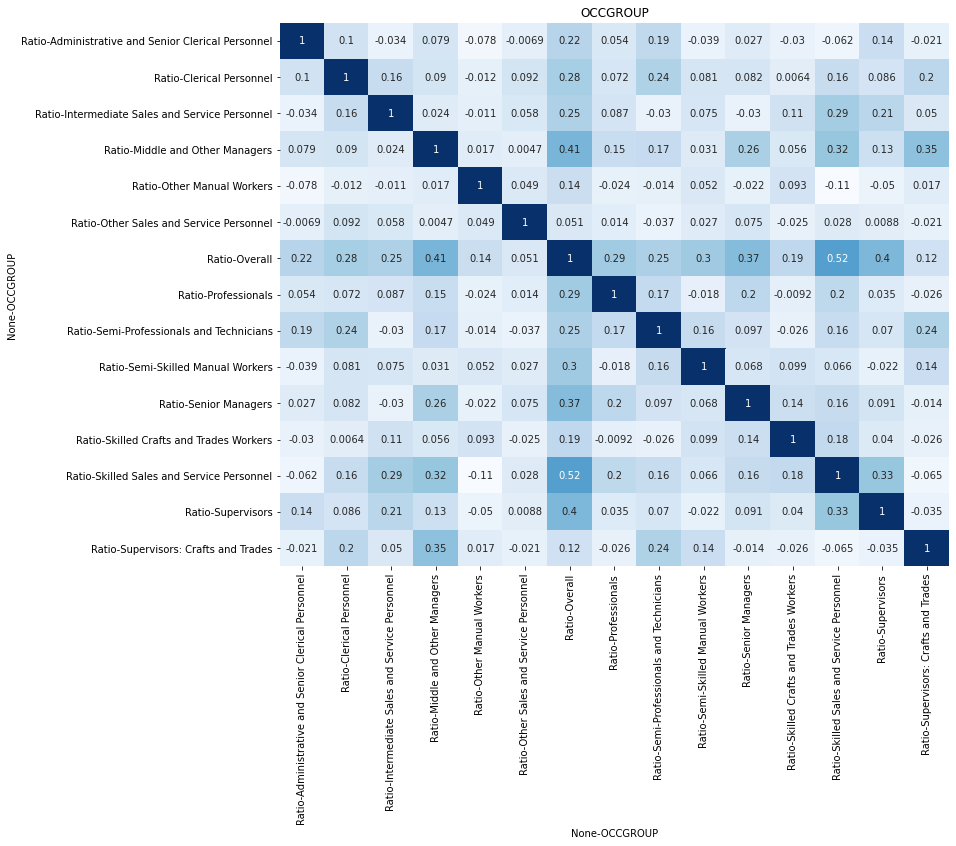

In [21]:
# overall diversification with OCCGROUP correlations 
heatmap(df2, 'OCCGROUP')

# Skilled sales and service has the highest correlation with overall diversification, 
# while senior managers and middle managers ranked the third and second highest correlations with overall diversification,
# considering the managers accounted for only a small portion of overall # of employees. 

Text(0.5, 1.0, 'Modified OCCGROUP')

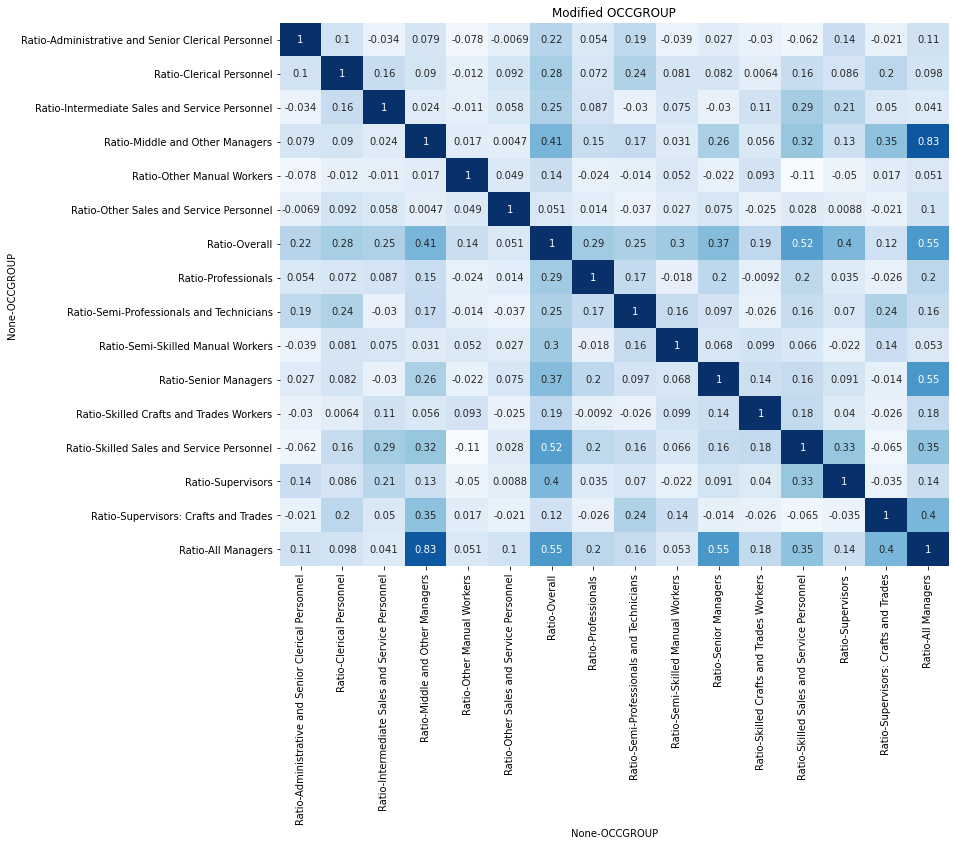

In [57]:
# modify df2 by combining all manager levels
# fill nan with 0
df2 = df2.fillna(0)

# for each employer and within each indicator group, find ratios of Women/Men to represent diversifications
df2 = df2[["EMPLOYERNAME","OCCGROUP","ALLMENCOUNT","ALLWOMENCOUNT"]]
df2_group= df2.groupby(['EMPLOYERNAME', "OCCGROUP"]).sum()
df2_group['Ratio'] = df2_group['ALLWOMENCOUNT']/df2_group["ALLMENCOUNT"]

# keep ratio and unstack OCCGroup
df_unstack = df2_group.drop(['ALLMENCOUNT','ALLWOMENCOUNT'], axis=1).unstack("OCCGROUP")

# unstack OCCGROUP
df2_un = df2_group.unstack('OCCGROUP')
# combine manager levels
df2_un[('ALLMENCOUNT','All Managers')] = df2_un[('ALLMENCOUNT','Senior Managers')]+df2_un[('ALLMENCOUNT','Middle and Other Managers')]
df2_un[('ALLWOMENCOUNT','All Managers')] = df2_un[('ALLWOMENCOUNT','Senior Managers')]+df2_un[('ALLWOMENCOUNT','Middle and Other Managers')]
df_unstack[('Ratio','All Managers')] = df2_un[('ALLWOMENCOUNT','All Managers')]/df2_un[('ALLMENCOUNT','All Managers')]

# correlations
Var_Corr = df_unstack.corr()
# plot
plt.figure(figsize=(12,10))
sns.heatmap(Var_Corr, cmap='Blues', annot=True, cbar=False)
plt.title('Modified OCCGROUP')

# All Managers has the highest correlation with the overall diversification between Men and Women

In [71]:
# employee # of each occ group in total
df2['count'] = df2['ALLWOMENCOUNT']+df2["ALLMENCOUNT"]
count = df2.groupby(['OCCGROUP']).sum().sort_values(by=['count'], ascending = False)
print(count)

                                              ALLMENCOUNT  ALLWOMENCOUNT  \
OCCGROUP                                                                   
Overall                                         1260031.0       818017.0   
Professionals                                    242182.0       186631.0   
Intermediate Sales and Service Personnel         120119.0       197489.0   
Clerical Personnel                               124986.0       139512.0   
Semi-Skilled Manual Workers                      222472.0        30449.0   
Middle and Other Managers                        141197.0       104404.0   
Skilled Crafts and Trades Workers                165792.0         8001.0   
Semi-Professionals and Technicians               103620.0        24768.0   
Supervisors                                       27877.0        37714.0   
Skilled Sales and Service Personnel               30776.0        34522.0   
Administrative and Senior Clerical Personnel      15377.0        40348.0   
Supervisors:

In [74]:
# women/men in total for each occ group
count['WtM'] = count['ALLWOMENCOUNT']/count['ALLMENCOUNT']
print(count['WtM'])

OCCGROUP
Overall                                         0.649204
Professionals                                   0.770623
Intermediate Sales and Service Personnel        1.644111
Clerical Personnel                              1.116221
Semi-Skilled Manual Workers                     0.136867
Middle and Other Managers                       0.739421
Skilled Crafts and Trades Workers               0.048259
Semi-Professionals and Technicians              0.239027
Supervisors                                     1.352872
Skilled Sales and Service Personnel             1.121718
Administrative and Senior Clerical Personnel    2.623919
Supervisors: Crafts and Trades                  0.091336
Senior Managers                                 0.415761
Other Manual Workers                            0.136128
Other Sales and Service Personnel               0.652879
Name: WtM, dtype: float64


In [81]:
# Women/Men ratio based on 2016 LMA data in Canada
ratios = {'Overall':0.93,
    'All Managers': 0.62,
    'Professionals': 1.27,
    'Semi-Professionals and Technicians': 1.16,
    'Supervisors': 1.27,
    'Supervisors: Crafts and Trades': 0.12,
    'Administrative and Senior Clerical Personnel': 4.78,
    'Skilled Sales and Service Personnel': 1.02,
    'Skilled Crafts and Trades Workers': 0.04,
    'Clerical Personnel': 2.24,
    'Intermediate Sales and Service Personnel':2.14,
    'Semi-Skilled Manual Workers': 0.20,
    'Other Sales and Service Personnel': 1.27,
    'Other Manual Workers': 0.26,
}
# calculate the ratios of companies that achieved in each occ group, 
# considering in the range of 10% above and 10% less of Women/Men LMA ratios is achieved
def calAchievedPercent(param):
    a = []
    for i in df_unstack[('Ratio', param)]:
        if i >= ratios[param]-0.1 and i <= ratios[param]+0.1:
            a.append(i)
    ratio = len(a)/len(np.unique(df2['EMPLOYERNAME']))
    return ratio


In [82]:
for i in ratios:
    print(i, 'achieved percent: {:.2%}'.format(calAchievedPercent(i)))

# For Skilled Crafts and Trades Workers, women/men ratio is about 1/20
# For Semi-Skilled Manual Workers, women/men ratio is about 1/7
# For Supervisors: Crafts and Trades, women/men ratio is about 1/10
# For managers, women/men ratio is about 1/1.4

Overall achieved percent: 5.90%
All Managers achieved percent: 12.65%
Professionals achieved percent: 3.20%
Semi-Professionals and Technicians achieved percent: 0.84%
Supervisors achieved percent: 2.70%
Supervisors: Crafts and Trades achieved percent: 13.32%
Administrative and Senior Clerical Personnel achieved percent: 0.17%
Skilled Sales and Service Personnel achieved percent: 2.19%
Skilled Crafts and Trades Workers achieved percent: 65.43%
Clerical Personnel achieved percent: 2.53%
Intermediate Sales and Service Personnel achieved percent: 1.35%
Semi-Skilled Manual Workers achieved percent: 14.67%
Other Sales and Service Personnel achieved percent: 0.51%
Other Manual Workers achieved percent: 4.05%


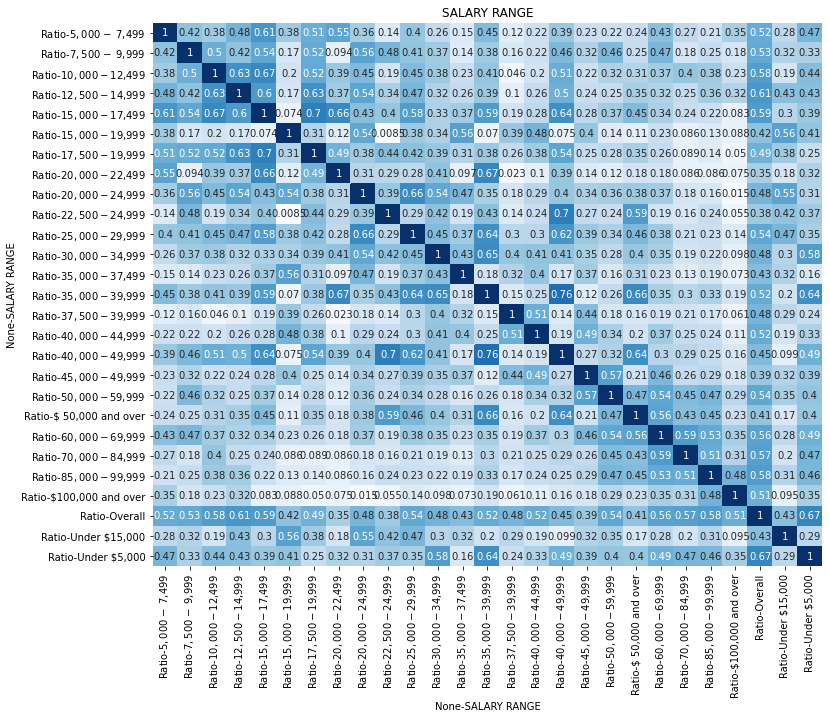

In [26]:
# overall diversification with SALARY RANGE group correlations 

# modify columns names
df3 = df3.rename(columns={'SALARYRANGE($)':'SALARY RANGE'})

heatmap(df3, 'SALARY RANGE')

# There is a clear pattern that the overall has highest correlations with the top salary group(above $60,000, which is managers salary)
# and the bottom salary group(below $17,499)

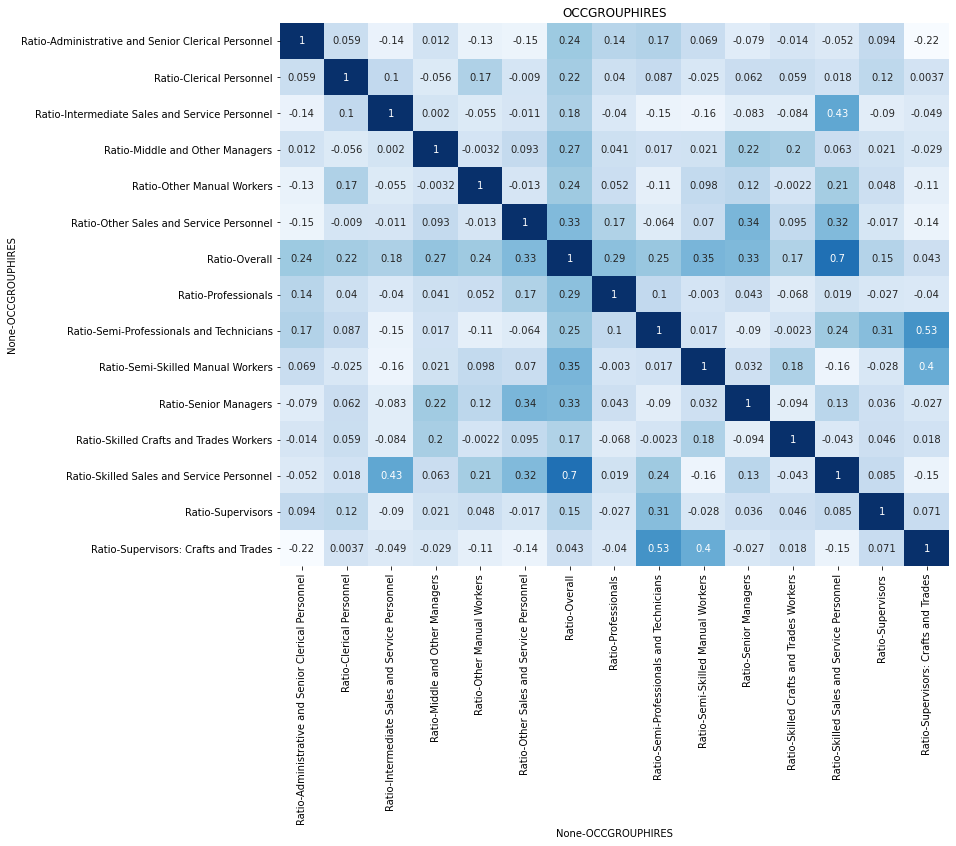

In [28]:
# overall hires diversification with OCCGROUP hires correlations 

# modify columns names
df4 = df4.rename(columns={'OCCGROUP':'OCCGROUPHIRES'})

heatmap(df4, 'OCCGROUPHIRES')

# The highest correlation with overall hires is the Skilled Sales and Service

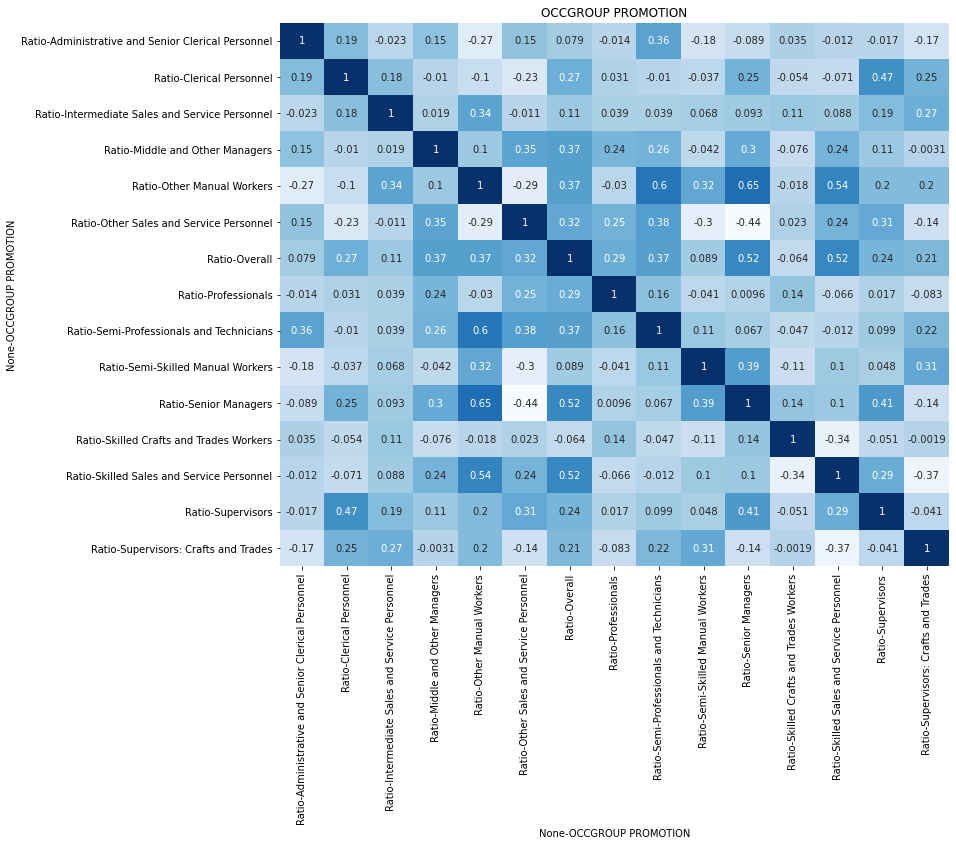

In [52]:
# # overall promotion diversification with OCCGROUP promotion correlations 

# modify column names
df5 = df5.rename({'OCCGROUP':'OCCGROUP PROMOTION'}, axis=1)

heatmap(df5, 'OCCGROUP PROMOTION')

# The highest correlation with overall promotion is Senior Managers, and Skilled Sales and Service

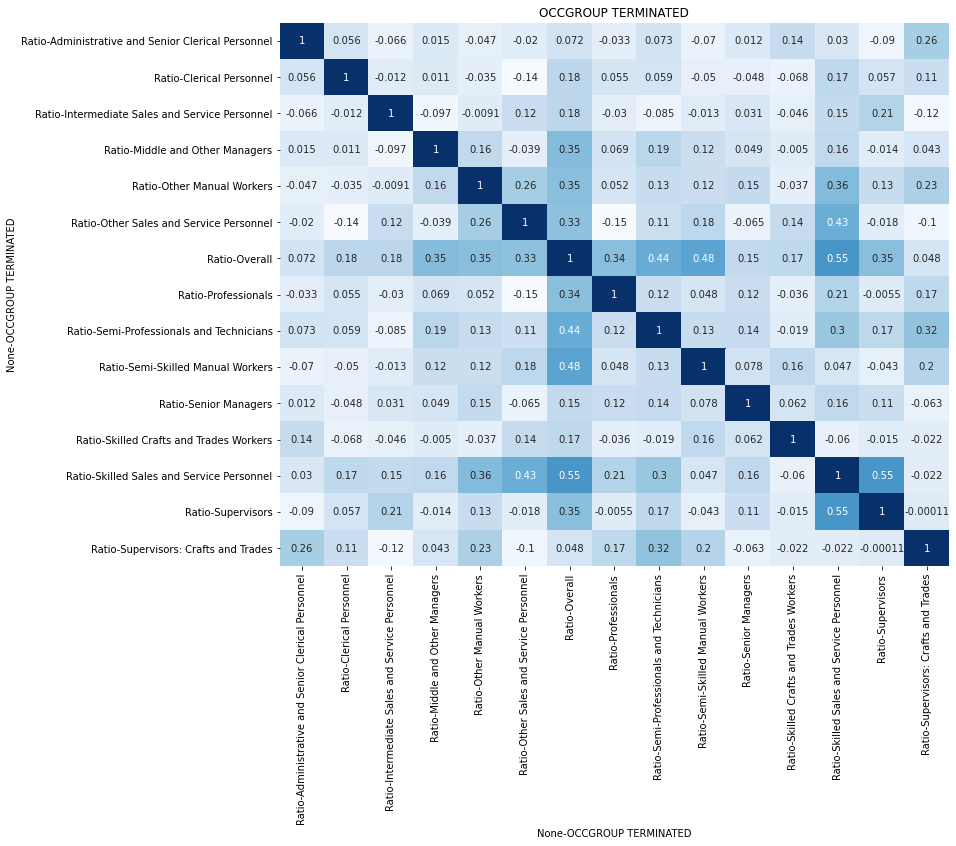

In [39]:
# overall terminated diversification with OCCGROUP terminated correlations 

# modify columns names
df6 = df6.rename(columns={'OCCGROUP':'OCCGROUP TERMINATED'})

heatmap(df6, 'OCCGROUP TERMINATED')

# The highest correlation with overall terminated is Skilled Sales and Service

In [ ]:
# next setp is to check managers correlation trends from 1997 to 2019, and trends for managers achieved percentage